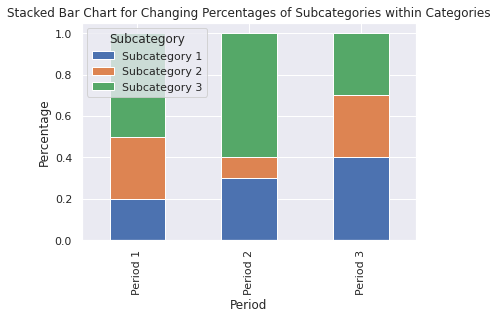

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'Period': ['Period 1', 'Period 1', 'Period 1', 
                   'Period 2', 'Period 2', 'Period 2', 
                   'Period 3', 'Period 3', 'Period 3'], 
        'Category': ['Category A', 'Category A', 'Category A',
                     'Category B', 'Category B', 'Category B',
                     'Category C', 'Category C', 'Category C'],
        'Subcategory': ['Subcategory 1', 'Subcategory 2', 'Subcategory 3',
                        'Subcategory 1', 'Subcategory 2', 'Subcategory 3',
                        'Subcategory 1', 'Subcategory 2', 'Subcategory 3'],
        'Percentage': [0.2, 0.3, 0.5, 0.3, 0.1, 0.6, 0.4, 0.3, 0.3]}

df = pd.DataFrame(data)

# Pivot the data to create a nested DataFrame
df_pivot = df.pivot(index='Period', columns='Subcategory', values='Percentage')
df_pivot = df_pivot.divide(df_pivot.sum(axis=1), axis=0)

# Plot the chart
sns.set(style="darkgrid")
df_pivot.plot(kind="bar", stacked=True)

# Add labels and title
plt.xlabel("Period")
plt.ylabel("Percentage")
plt.title("Stacked Bar Chart for Changing Percentages of Subcategories within Categories")

plt.show()


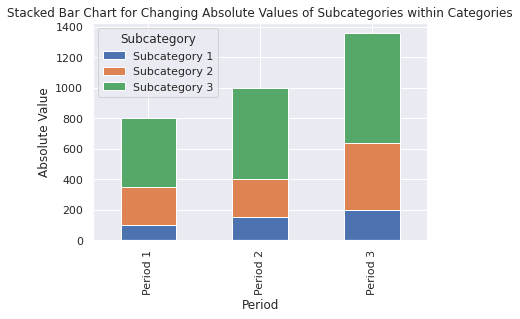

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'Period': ['Period 1', 'Period 1', 'Period 1', 
                   'Period 2', 'Period 2', 'Period 2', 
                   'Period 3', 'Period 3', 'Period 3'], 
        'Category': ['Category A', 'Category A', 'Category A',
                     'Category B', 'Category B', 'Category B',
                     'Category C', 'Category C', 'Category C'],
        'Subcategory': ['Subcategory 1', 'Subcategory 2', 'Subcategory 3',
                        'Subcategory 1', 'Subcategory 2', 'Subcategory 3',
                        'Subcategory 1', 'Subcategory 2', 'Subcategory 3'],
        'Value': [100, 150, 200, 150, 100, 350, 200, 240, 280]}

df = pd.DataFrame(data)

# Pivot the data to create a nested DataFrame
df_pivot = df.pivot(index='Period', columns='Subcategory', values='Value')
df_pivot = df_pivot.cumsum(axis=1)

# Plot the chart
sns.set(style="darkgrid")
df_pivot.plot(kind="bar", stacked=True)

# Add labels and title
plt.xlabel("Period")
plt.ylabel("Absolute Value")
plt.title("Stacked Bar Chart for Changing Absolute Values of Subcategories within Categories")

plt.show()


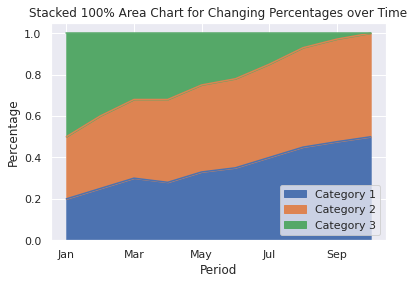

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'Period': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
        'Category 1': [20, 25, 30, 28, 33, 35, 40, 45, 50, 55],
        'Category 2': [30, 35, 38, 40, 42, 43, 45, 48, 52, 55],
        'Category 3': [50, 40, 32, 32, 25, 22, 15, 7, 3, 0]}

df = pd.DataFrame(data)

# Set the index to the "Period" column and normalize the data
df.set_index('Period', inplace=True)
df = df.divide(df.sum(axis=1), axis=0)

# Plot the chart
sns.set(style="darkgrid")
df.plot(kind="area", stacked=True)

# Add labels and title
plt.xlabel("Period")
plt.ylabel("Percentage")
plt.title("Stacked 100% Area Chart for Changing Percentages over Time")

plt.show()


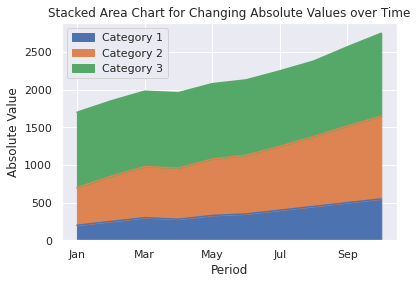

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'Period': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
        'Category 1': [200, 250, 300, 280, 330, 350, 400, 450, 500, 550],
        'Category 2': [300, 350, 380, 400, 420, 430, 450, 480, 520, 550],
        'Category 3': [500, 400, 320, 320, 250, 220, 150, 70, 30, 0]}

df = pd.DataFrame(data)

# Set the index to the "Period" column
df.set_index('Period', inplace=True)

# Calculate the cumulative sum for each column
df = df.cumsum(axis=1)

# Plot the chart
sns.set(style="darkgrid")
df.plot(kind="area", stacked=True)

# Add labels and title
plt.xlabel("Period")
plt.ylabel("Absolute Value")
plt.title("Stacked Area Chart for Changing Absolute Values over Time")

plt.show()


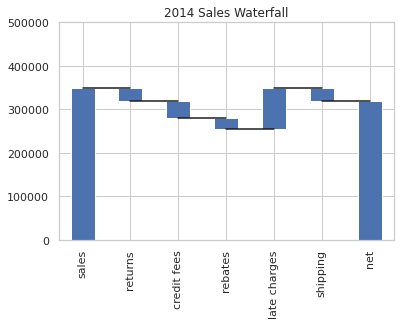

In [33]:
import matplotlib.pyplot as plt
import numpy as np

index = ['sales','returns','credit fees','rebates','late charges','shipping']
data = {'amount': [350000,-30000,-40000,-25000,95000,-30000]}
trans = pd.DataFrame(data=data,index=index)
blank=trans.amount.cumsum().shift(1).fillna(0)

total = trans.sum().amount
trans.loc["net"] = total
blank.loc["net"] = total

step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan

blank.loc["net"] = 0


my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, title="2014 Sales Waterfall")
my_plot.plot(step.index, step.values,'k')

plt.ylim(0,500000)
plt.show()



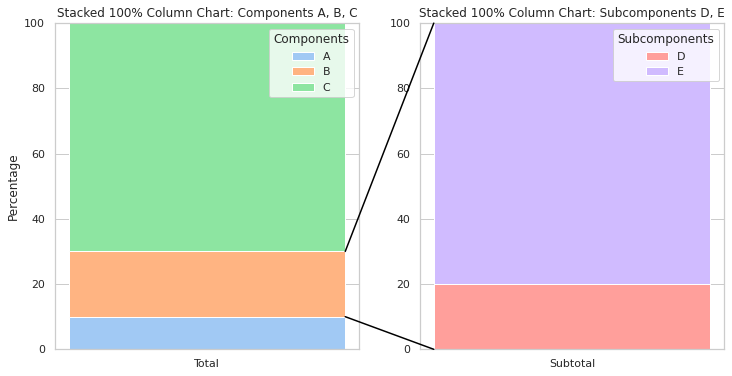

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch

# Sample data
data = {'Components': ['A', 'B', 'C'],
        'Values': [10, 20, 70]}

subcomponent_data = {'Components': ['D', 'E'],
                     'Values': [20, 80]}

df = pd.DataFrame(data)
df_sub = pd.DataFrame(subcomponent_data)

# Convert the raw data to percentages
total = df['Values'].sum()
df_percentage = df['Values'] / total * 100

total_sub = df_sub['Values'].sum()
df_sub_percentage = df_sub['Values'] / total_sub * 100

# Plot the 100% stacked column charts
sns.set(style='whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Components A, B, and C
bottom = 0
colors = sns.color_palette('pastel')[:3]

for idx, (component, value, color) in enumerate(zip(df['Components'], df_percentage, colors)):
    ax1.bar('Total', value, bottom=bottom, label=component, color=color)
    bottom += value

# Plot Components D and E
bottom = 0
colors = sns.color_palette('pastel')[3:5]

for idx, (component, value, color) in enumerate(zip(df_sub['Components'], df_sub_percentage, colors)):
    ax2.bar('Subtotal', value, bottom=bottom, label=component, color=color)
    bottom += value

# Draw arrows using ConnectionPatch
arrow1 = ConnectionPatch(xyA=(0.4, 30), coordsA=ax1.transData,
                         xyB=(-0.4, 100), coordsB=ax2.transData,
                         arrowstyle='-', lw=1.5, color='black')
fig.add_artist(arrow1)

arrow2 = ConnectionPatch(xyA=(0.4,10), coordsA=ax1.transData,
                         xyB=(-0.4, 0), coordsB=ax2.transData,
                         arrowstyle='-', lw=1.5, color='black')
fig.add_artist(arrow2)

# Set axis labels and limits
ax1.set_ylabel('Percentage')
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)

# Add legends
ax1.legend(title="Components")
ax2.legend(title="Subcomponents")

# Set chart titles
ax1.set_title('Stacked 100% Column Chart: Components A, B, C')
ax2.set_title('Stacked 100% Column Chart: Subcomponents D, E')

plt.show()
